In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading data

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train
print((test['MSSubClass']))

0        20
1        20
2        60
3        60
4       120
       ... 
1454    160
1455    160
1456     20
1457     85
1458     60
Name: MSSubClass, Length: 1459, dtype: int64


In [5]:
TARGET = 'SalePrice'

#X : all the data 
X = pd.concat([train.drop([TARGET], axis = 1), test], axis = 0)
y = train[TARGET]

In [6]:
print(len(train.columns),len(train))
print(len(X.columns),len(X))
print(len(y))

81 1460
80 2919
1460


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
num_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']
               and col not in ['Id']]
cat_features = [col for col in X.columns if X[col].dtype == 'object']

In [9]:
print(num_features)
print(len(num_features))
print(cat_features)
print(len(cat_features))
old_cat_features = cat_features
old_num_features = num_features

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
36
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Garage

## Categorical features

In [10]:
len(cat_features)

43

In [11]:
# Features like 'MiscFeature', 'PoolQC', 'Alley' have mostly missing values, 
# So we remove cols which have 75% of the missing values

threshold = 0.75
less_useful_cat_features = [col for col in cat_features if train[col].isnull().sum() > threshold * len(train)]      
less_useful_cat_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
cat_features = list(set(cat_features) - set(less_useful_cat_features))
len(cat_features)

39

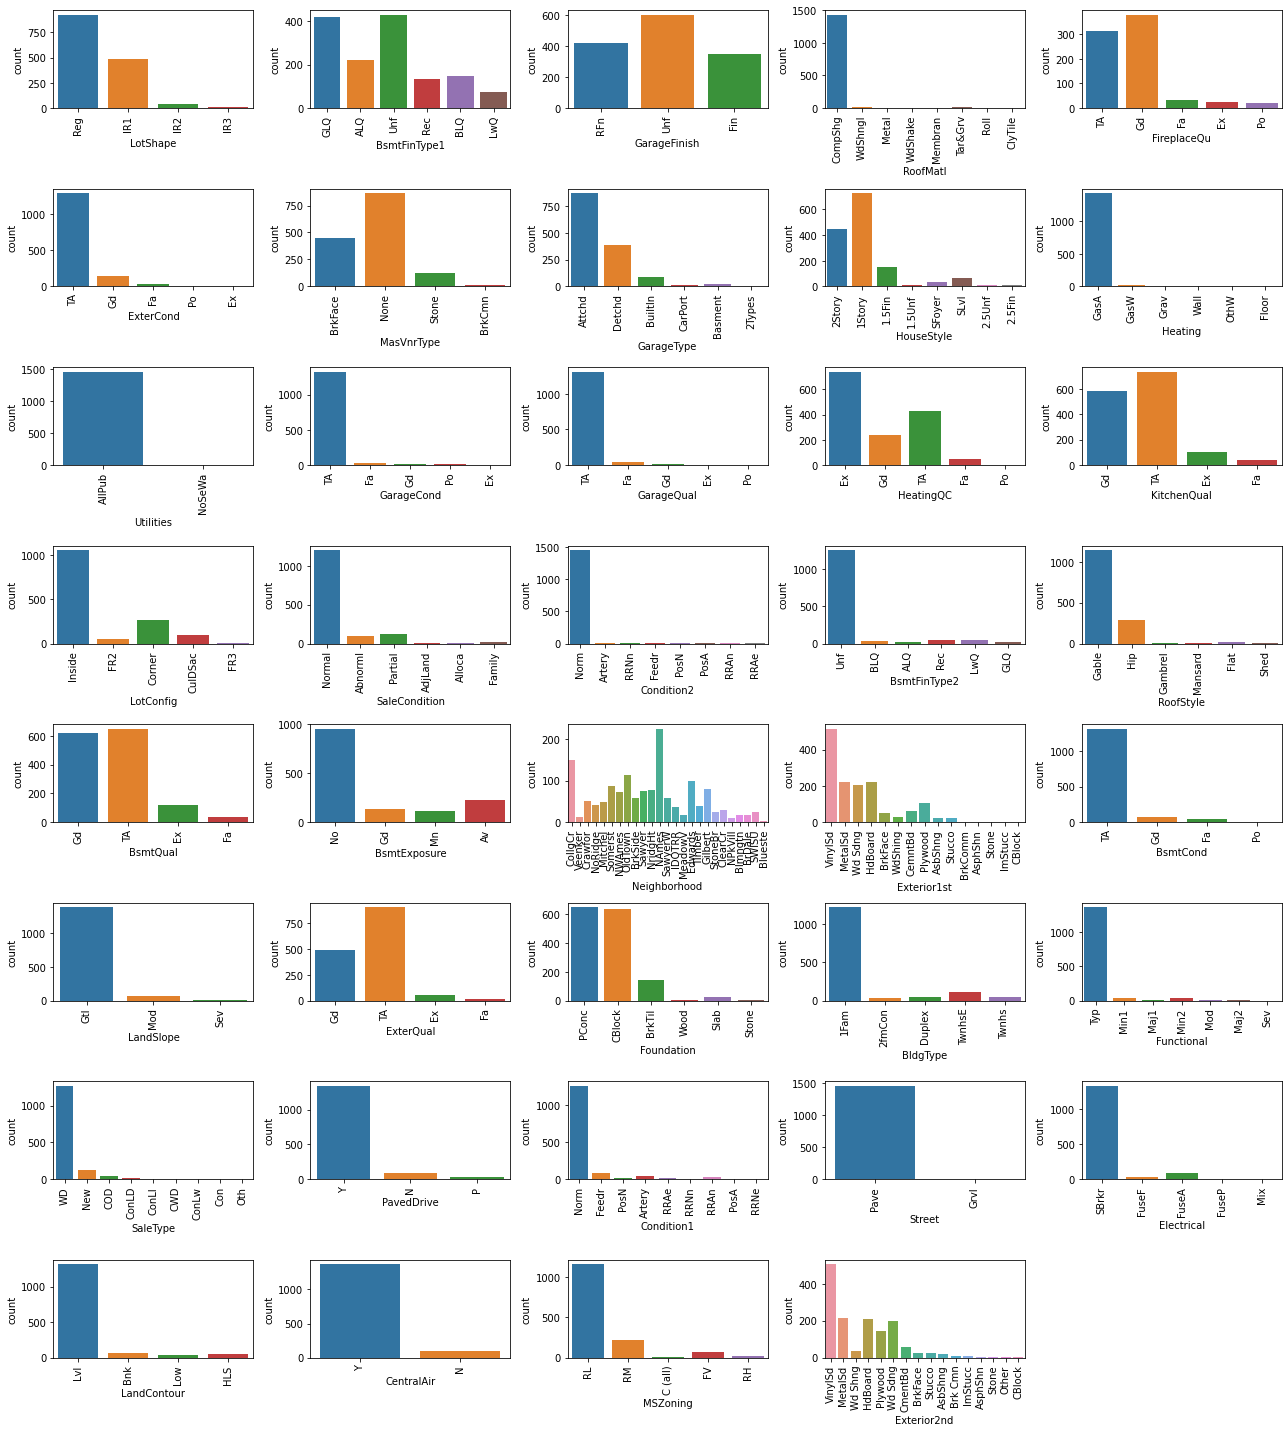

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (18, 20))
for index in range(len(cat_features)):
    plt.subplot(8, 5, index + 1)
    sns.countplot(data = train.dropna(), x = train.loc[:, cat_features[index]])
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [14]:
1400 / 1460

0.958904109589041

In [15]:
#print(train['Street'].unique())
#print(train['LandSlope'].unique())
print(train['LandSlope'].value_counts())
print(train['LandSlope'].value_counts().iloc[0])
#train['Street'].value_counts().iloc[0]

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
1382


In [16]:
# Features like 'Street', 'Utilities' have mostly only one value, 
# So we remove cols which have 96% of the same values

threshold = 0.96
less_useful_cat_features = []
for col in cat_features:
    cnt = train[col].value_counts().iloc[0]
    if cnt > threshold * len(train):
        less_useful_cat_features.append(col)
        
less_useful_cat_features

['RoofMatl', 'Heating', 'Utilities', 'Condition2', 'Street']

In [17]:
cat_features = list(set(cat_features) - set(less_useful_cat_features))
len(cat_features)

34

## Numeric features

In [18]:
len(num_features) 

36

In [19]:
# Unlike cat_features, features in num_features don't have many missing values

threshold = 0.75
[col for col in num_features if train[col].isnull().sum() > threshold * len(train)]

[]

In [20]:
train['LandContour'].nunique()

4

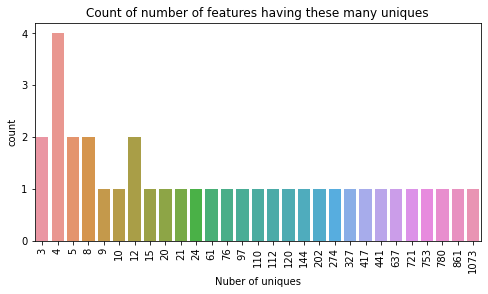

In [21]:
plt.figure(figsize = (8, 4))
plt.xlabel('Nuber of uniques')
plt.xticks(rotation = 90)
plt.yticks([0, 1, 2, 3, 4])
plt.title('Count of number of features having these many uniques')
sns.countplot(x = [train[col].nunique() for col in num_features])
plt.show()

In [22]:
#we divide num features into disc and cont
threshold = 12
disc_num_features = [col for col in num_features if train[col].nunique() <= threshold]
print(len(disc_num_features))
cont_num_features = list(set(num_features) - set(disc_num_features))
len(cont_num_features)

14


22

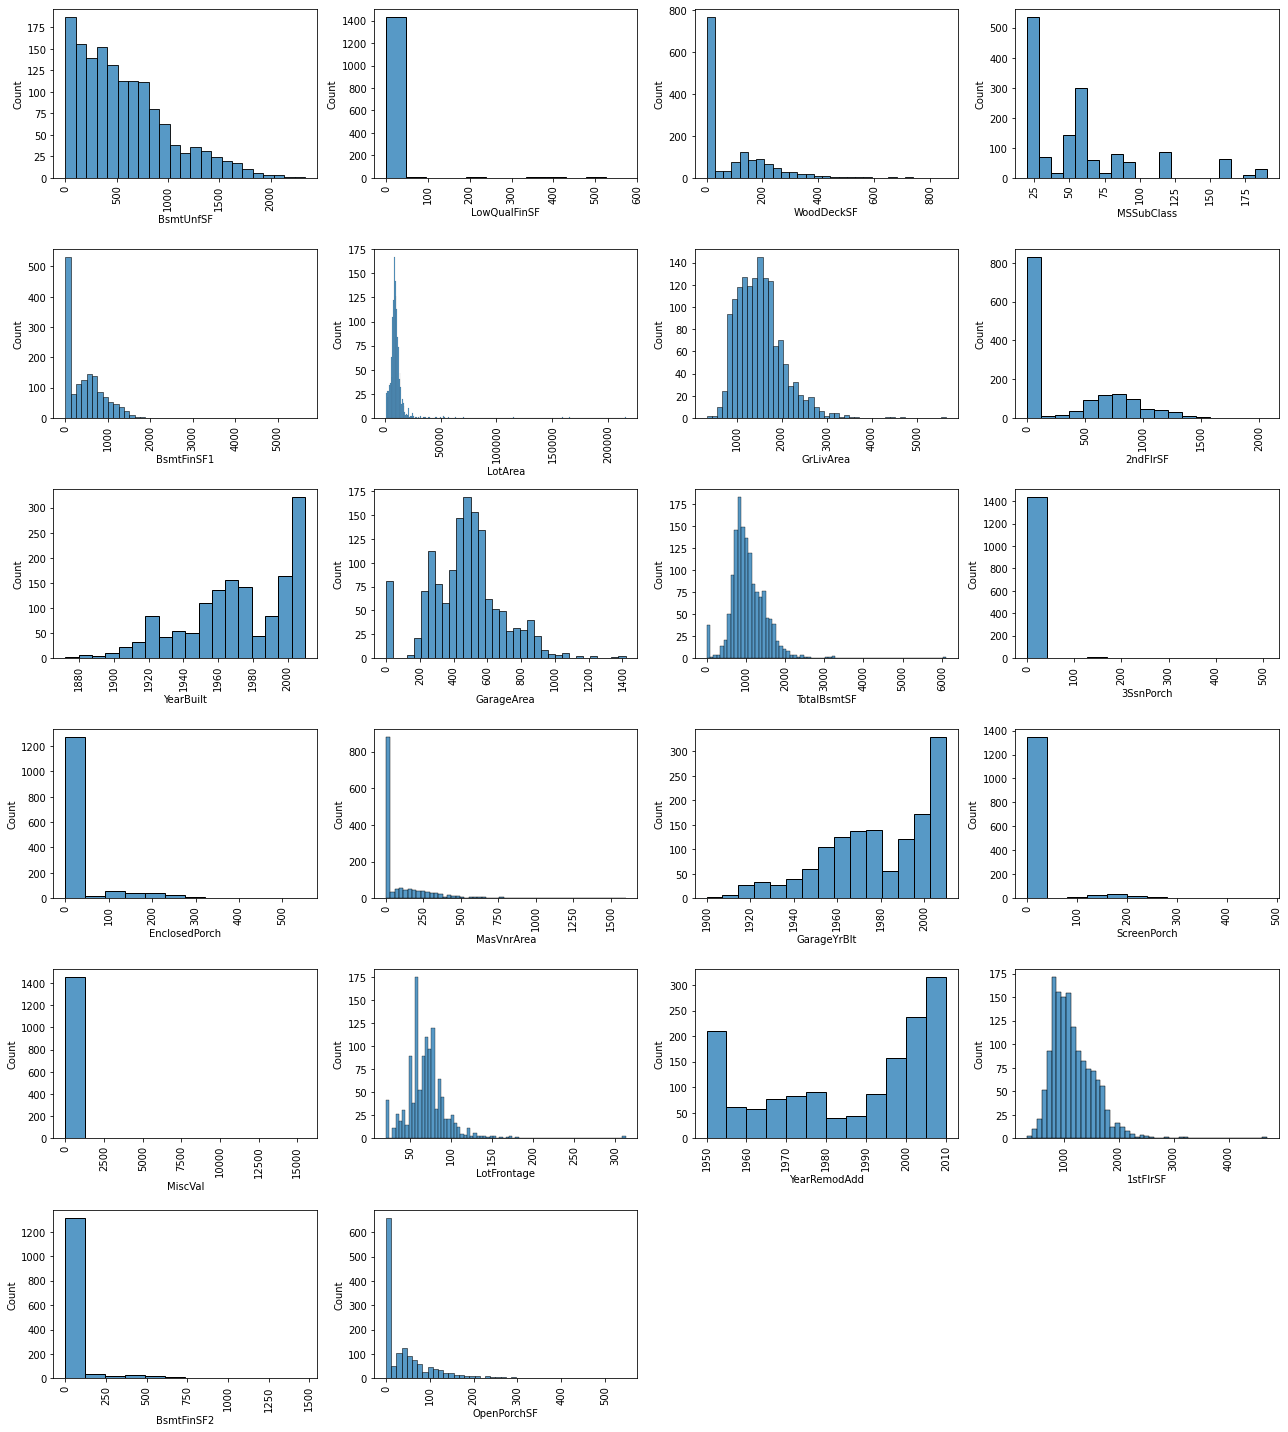

In [23]:
fig = plt.figure(figsize = (18, 20))

for index in range(len(cont_num_features)):
    plt.subplot(6, 4, index + 1)
    sns.histplot(train.loc[:, cont_num_features[index]].dropna(), kde = False)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [24]:
# Features like 'ScreenPorch', 'LowQualFinSF' are highly skewed
# So we remove these cols 
        
skewed_num_features = ['ScreenPorch', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF2', 'MiscVal', 'EnclosedPorch']
cont_num_features = list(set(cont_num_features) - set(skewed_num_features))
len(cont_num_features)

16

In [25]:
len(disc_num_features)

14

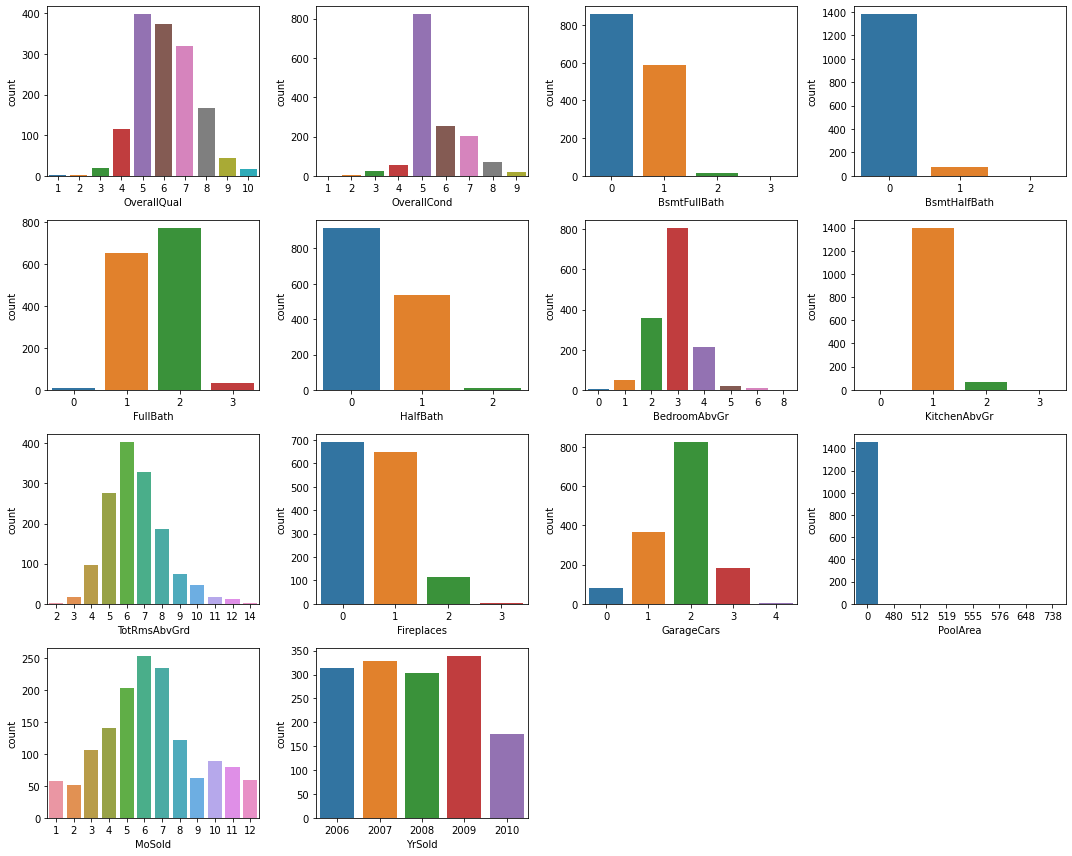

In [26]:
fig = plt.figure(figsize = (15, 12))

for index, col in enumerate(disc_num_features):
    plt.subplot(4, 4, index + 1)
    sns.countplot(x = train.loc[:, disc_num_features[index]].dropna())
    plt.tight_layout()

In [27]:
# 'PoolArea' is highly skewed
disc_num_features.remove('PoolArea')

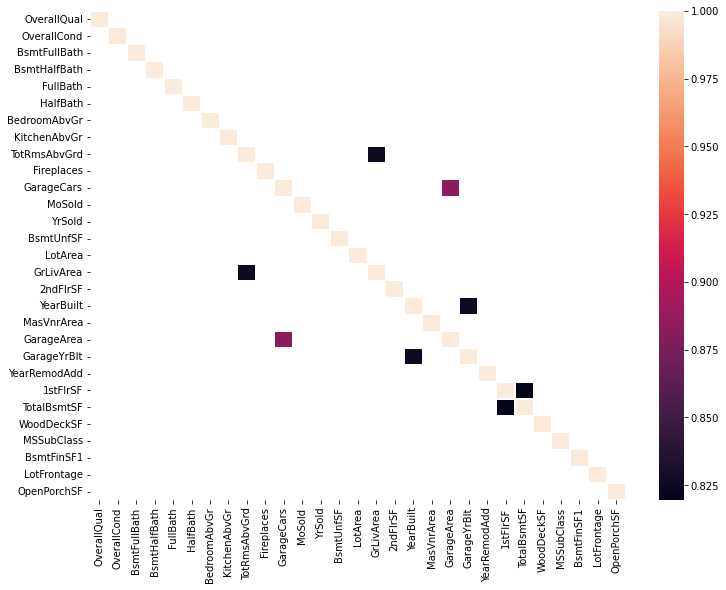

In [28]:
plt.figure(figsize = (12, 9))

corr_matrix = train[disc_num_features + cont_num_features].corr()
sns.heatmap(corr_matrix, mask = corr_matrix < 0.8, linewidth = 0.5)

In [29]:
# We remove the highly correlated features:
# GarageYrBlt and YearBuilt, TotRmsAbvGrd and GrLivArea, stFlrSF and TotalBsmtSF, 
# GarageArea and GarageCars

highly_corr_features = ['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars']

for feature in highly_corr_features:
    if feature in disc_num_features: 
        disc_num_features.remove(feature)
    if feature in cont_num_features: 
        cont_num_features.remove(feature)

In [30]:
num_features = cont_num_features+ disc_num_features
print(len(num_features))

25


In [31]:
len(num_features)

25

In [32]:
# Now we're left with 59 features
len(num_features) + len(cat_features)

59

## Outlier Detection

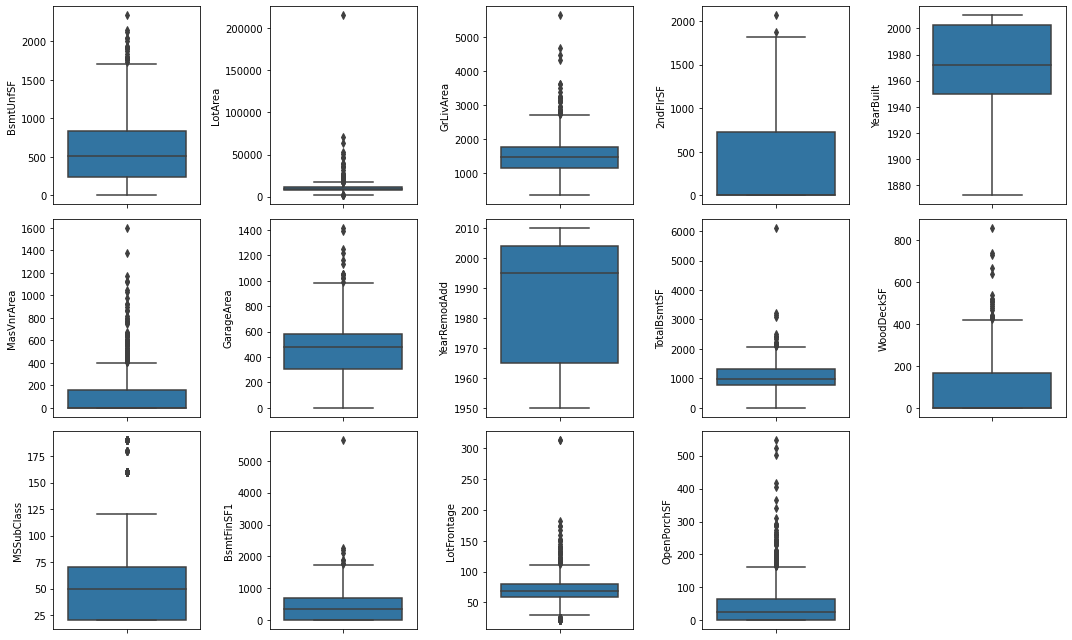

In [33]:
fig = plt.figure(figsize = (15, 9))
for index,col in enumerate(cont_num_features):
    plt.subplot(3, 5, index + 1)
    sns.boxplot(y = col, data = train[cont_num_features].dropna())
    plt.tight_layout()
plt.show()

In [34]:
# Extreme ouliers are present in 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 
# 'LotFrontage' and 'GrLivArea'

train = train.drop(train[train['LotFrontage'] > 200].index)

train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)

## Preprocessing Pipeline

In [35]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy = 'median')), #SimpleImputer will work only on empty values (np.NaN)
    ('num_scaler', StandardScaler()), 
])

In [36]:
from sklearn.preprocessing import OneHotEncoder
#SimpleImputer(strategy = 'most_frequent') : If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. 

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),  #SimpleImputer will work only on empty values (np.NaN)
    ('cat_encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), #unknown data will be ignored
])

In [37]:
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features), 
    ('cat', cat_pipeline, cat_features), 
])

## Modelling

In [38]:
X = preprocess_pipeline.fit_transform(train[num_features + cat_features])
y = train[TARGET]

In [39]:
#save the preprocess pipeline fitted on training data
import pickle

# save the model to disk
pickle.dump(preprocess_pipeline, open('preprocess_pipeline.pkl', 'wb'))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [41]:
print(X_test.shape)
X_train.shape


(436, 238)


(1015, 238)

## training and evaluationg a LightGBM

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(boosting_type = 'gbdt', objective = 'regression')

param_distribs = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25], 
}

lgbm_reg = RandomizedSearchCV(lgbm, param_distributions = param_distribs, 
                             scoring = 'neg_root_mean_squared_error', 
                             n_iter = 100, cv = 5, n_jobs = -1)

lgbm_search = lgbm_reg.fit(X_train, y_train)

# LightGBM with tuned hyperparameters
best_param = lgbm_search.best_params_
lgbm = LGBMRegressor(**best_param)

In [43]:
# evaluate the model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import joblib

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(lgbm, X, y, cv = cv)

print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

#fit the model on our data
lgbm.fit(X_train,y_train)

#save the model
joblib.dump(lgbm, 'model.pkl')

[0.93683032 0.90685574 0.92550091 0.91946742 0.90351454 0.90821575
 0.91245311 0.90400418 0.93707763 0.92664583]
Accuracy: 0.918 (0.012)


['model.pkl']

##testing the model on one input

In [47]:
input = {

 "MSSubClass":20,
 "MSZoning":"RH",
 "LotFrontage":80,
 "LotArea":11622,
 "Street":"Pave",
 "Alley":"NA",
 "LotShape":"Reg",
"LandContour":"Lvl",
"Utilities":"AllPub",
"LotConfig":"Inside",
"LandSlope":"Gtl",
"Neighborhood":"NAmes",
"Condition1":"Feedr",
"Condition2":"None",
"BldgType":"1Fam",
"HouseStyle":"1Story",
"OverallQual":5,
"OverallCond":6,
"YearBuilt":1961,
"YearRemodAdd":1961,
"RoofStyle":"Gable",
"RoofMatl":"CompShg",
"Exterior1st":"None",
"Exterior2nd":"VinylSd",
"MasVnrType":"None",
"MasVnrArea":0,
"ExterQual":"TA",
"ExterCond":"TA",
"Foundation":"None",
"BsmtQual":"TA",
"BsmtCond":"TA",
"BsmtExposure":"None",
"BsmtFinType1":"Rec",
"BsmtFinSF1":468,
"BsmtFinType2":"LwQ",
"BsmtUnfSF":144,
"TotalBsmtSF":270,
"Heating":"GasA",
"HeatingQC":"TA",
"CentralAir":"Y",
"Electrical":"None",
"1stFlrSF":896,
"2ndFlrSF":0,
"LowQualFinSF":0,
"GrLivArea":896,
"BsmtFullBath":0,
"BsmHalfBath":0,
"FullBath":1,
"HalfBath":1,
"BedroomAbvGr":2,
"KitchenAbvGr":1,
"KitchenQual":"TA",
"TotRmsAbvGrd":5,
"Function":"TYP",
"Fireplaces":0,
"FirepalceQu":"None",
"GarageType":"None",
"GarageYrBlt":1961,
"GarageFinish":"Unf",
"GarageCars":1,
"GarageArea":730,
"GarageQual":"TA",
"GarageCond":"TA",
"PavedDrive":"Y",
"WoodDeckSF":140,
"OpenPorchSF":0,
"EnclosedPorch":0,
"3SsnPorch":0,
"ScreenPorch":120,
"PoolArea":0,
"PoolQC":"NA",
"Fence":"MnPrv",
"MiscFeature":"None",
"MiscVal":0,
"MoSold":6,
"YrSold":2010,
"SaleType":"WD",
"SaleCondition":"None",
"BsmtHalfBath" :0,
"Functional" :"Typ",
"FireplaceQu":"Ex"

}

# obj = json.loads(input2)

# print(type(obj))

# print(obj)

df = pd.DataFrame(input,index=[0])

print(type(df['MSSubClass'][0]))

print(df)

<class 'numpy.int64'>
   MSSubClass MSZoning  LotFrontage  ...  BsmtHalfBath Functional FireplaceQu
0          20       RH           80  ...             0        Typ          Ex

[1 rows x 81 columns]


In [48]:
to_predict = preprocess_pipeline.transform(df)
print(to_predict)
y_pred = lgbm.predict(to_predict)

print(y_pred)


[[-0.95843804  0.29814726 -1.22594338 -0.79709961 -0.33767396 -0.57299463
   1.21923498 -1.15295714 -1.89614092  0.37508844 -0.87308307  0.07647838
   0.53744105 -0.70770165 -0.79345005  0.38171427 -0.81884801 -0.23864854
  -1.02276531  1.22831498 -1.05890719 -0.21213777 -0.94996057 -0.11950721
   1.64046104  0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   0.          1.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.   

In [51]:
input = """{

 "MSSubClass":"0",
 "MSZoning":"RH",
 "LotFrontage":"80",
 "LotArea":"11622",
 "Street":"Pave",
 "Alley":"NA",
 "LotShape":"Reg",
"LandContour":"Lvl",
"Utilities":"None",
"LotConfig":"Inside",
"LandSlope":"Gtl",
"Neighborhood":"NAmes",
"Condition1":"Feedr",
"Condition2":"Norm",
"BldgType":"1Fam",
"HouseStyle":"1Story",
"OverallQual":"5",
"OverallCond":"6",
"YearBuilt":"1961",
"YearRemodAdd":"1961",
"RoofStyle":"Gable",
"RoofMatl":"CompShg",
"Exterior1st":"VinylSd",
"Exterior2nd":"VinylSd",
"MasVnrType":"None",
"MasVnrArea":"0",
"ExterQual":"TA",
"ExterCond":"TA",
"Foundation":"None",
"BsmtQual":"TA",
"BsmtCond":"TA",
"BsmtExposure":"No",
"BsmtFinType1":"Rec",
"BsmtFinSF1":"468",
"BsmtFinType2":"LwQ",
"BsmtUnfSF":"144",
"TotalBsmtSF":"270",
"Heating":"GasA",
"HeatingQC":"TA",
"CentralAir":"Y",
"Electrical":"SBrkr",
"1stFlrSF":"896",
"2ndFlrSF":"0",
"LowQualFinSF":"0",
"GrLivArea":"896",
"BsmtFullBath":"0",
"BsmHalfBath":"0",
"FullBath":"1",
"HalfBath":"1",
"BedroomAbvGr":"2",
"KitchenAbvGr":"1",
"KitchenQual":"TA",
"TotRmsAbvGrd":"5",
"Function":"TYP",
"Fireplaces":"0",
"FirepalceQu":"NA",
"GarageType":"Attchd",
"GarageYrBlt":"1961",
"GarageFinish":"Unf",
"GarageCars":"1",
"GarageArea":"730",
"GarageQual":"TA",
"GarageCond":"TA",
"PavedDrive":"Y",
"WoodDeckSF":"140",
"OpenPorchSF":"0",
"EnclosedPorch":"0",
"3SsnPorch":"0",
"ScreenPorch":"120",
"PoolArea":"0",
"PoolQC":"NA",
"Fence":"MnPrv",
"MiscFeature":"NA",
"MiscVal":"0",
"MoSold":"6",
"YrSold":"2010",
"SaleType":"WD",
"SaleCondition":"Normal",
"BsmtHalfBath" :"0",
"Functional" :"Typ",
"FireplaceQu":"Ex"



}"""

print(type(input))
import json

obj = json.loads(input) #incase req was a string

df = pd.DataFrame(obj,index=[0])

print((df['MSSubClass'][0]))

print(df)


<class 'str'>
0
  MSSubClass MSZoning LotFrontage  ... BsmtHalfBath Functional FireplaceQu
0          0       RH          80  ...            0        Typ          Ex

[1 rows x 81 columns]


In [52]:
to_predict = preprocess_pipeline.transform(df)
print(to_predict)
y_pred = lgbm.predict(to_predict)

print(y_pred)


[[-0.95843804  0.29814726 -1.22594338 -0.79709961 -0.33767396 -0.57299463
   1.21923498 -1.15295714 -1.89614092  0.37508844 -1.34658094  0.07647838
   0.53744105 -0.70770165 -0.79345005  0.38171427 -0.81884801 -0.23864854
  -1.02276531  1.22831498 -1.05890719 -0.21213777 -0.94996057 -0.11950721
   1.64046104  0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
   0.          1.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          1.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.   

## References

https://www.kaggle.com/angqx95/data-science-workflow-top-2-with-tuning/notebook

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py